In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
import time
import datetime
import seaborn
seaborn.set()

In [2]:
wiki = pd.read_json('wiki-company.json.gz', orient='record', lines=True)
rt = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
omdb = pd.read_json('omdb-data.json.gz', orient='record', lines=True)

In [3]:
data_temp = wiki.merge(rt, on = 'rotten_tomatoes_id')

In [4]:
data = data_temp.merge(omdb, left_on = 'imdb_id_x', right_on = 'imdb_id')
# we get 9612 final movies after such join/merge operations. Not bad. 

In [5]:
# data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9612 entries, 0 to 9611
Data columns (total 30 columns):
based_on              2076 non-null object
cast_member           8583 non-null object
country_of_origin     9586 non-null object
director              8886 non-null object
enwiki_title          9612 non-null object
filming_location      4254 non-null object
genre                 9612 non-null object
imdb_id_x             9612 non-null object
label                 9612 non-null object
made_profit           850 non-null float64
main_subject          2940 non-null object
metacritic_id         5223 non-null object
nbox                  985 non-null float64
ncost                 1071 non-null float64
original_language     9508 non-null object
production_company    5161 non-null object
publication_date      9610 non-null object
rotten_tomatoes_id    9612 non-null object
series                601 non-null object
wikidata_id           9612 non-null object
audience_average      8751 non-nu

In [7]:
# Question: is there an inflation on movie reviews, generally? For either critics or audience.
def getyear(x):
    return x[0:4]

def to_timestamp(date):
    return time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple())

data = data.dropna(subset=['publication_date','audience_percent','audience_average','critic_average','critic_percent','publication_date'])
data['year'] = data['publication_date'].apply(getyear)
data['timestamp'] = data['publication_date'].apply(to_timestamp)

data = data[data['audience_ratings']>=40]
# data
data['year'] = pd.to_numeric(data['year'])


In [8]:
fit = stats.linregress(data['year'], data['audience_percent'])
data['prediction'] = fit.slope*data['year'] + fit.intercept
fit.slope, fit.intercept

(-0.21878298879237346, 500.64619776900815)

In [9]:
# data[data['year'] == 1903].omdb_plot

Text(0, 0.5, 'Audience Percent')

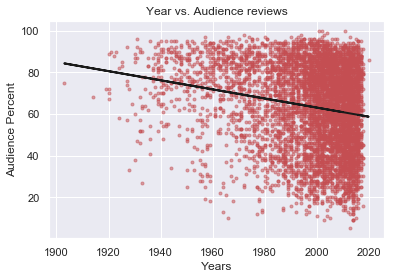

In [10]:
plt.plot(data['year'], data['audience_percent'], 'r.',alpha=0.5)
plt.plot(data['year'], data['prediction'],'k-', linewidth = 2)
plt.title('Year vs. Audience reviews')
plt.xlabel('Years')
plt.ylabel('Audience Percent')

Text(0, 0.5, 'Critic Percent')

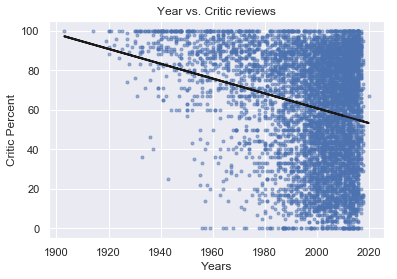

In [11]:
fit1 = stats.linregress(data['year'], data['critic_percent'])
data['prediction1'] = fit1.slope*data['year'] + fit1.intercept
plt.plot(data['year'], data['critic_percent'], 'b.',alpha=0.5)
plt.plot(data['year'], data['prediction1'],'k-', linewidth = 2)
plt.title('Year vs. Critic reviews')
plt.xlabel('Years')
plt.ylabel('Critic Percent')

Text(0, 0.5, 'audience average (out of 5)')

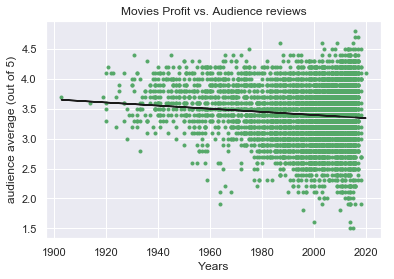

In [12]:
fit2 = stats.linregress(data['year'], data['audience_average'])
data['prediction2'] = fit2.slope*data['year'] + fit2.intercept
plt.plot(data['year'], data['audience_average'], 'g.')
plt.plot(data['year'], data['prediction2'],'k-')
plt.title('Year vs. Audience reviews')
plt.xlabel('Years')
plt.ylabel('audience average (out of 5)')

Text(0, 0.5, 'critic average (out of 10)')

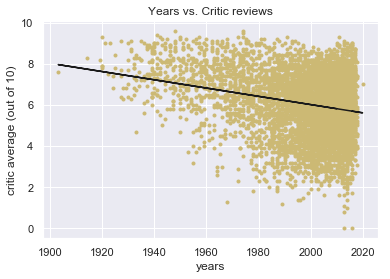

In [13]:
fit3 = stats.linregress(data['year'], data['critic_average'])
data['prediction3'] = fit3.slope*data['year'] + fit3.intercept
plt.plot(data['year'], data['critic_average'], 'y.')
plt.plot(data['year'], data['prediction3'],'k-')
plt.title('Year vs. Critic reviews')
plt.xlabel('years')
plt.ylabel('critic average (out of 10)')